In [6]:
import os

wikiart_folder = "./wikiart/"

# Mapped style names to class indices
style_classes = {
    "Abstract_Expressionism": 0,
    "Action_painting": 1,
    "Analytical_Cubism": 2,
    "Art_Nouveau_Modern": 3,
    "Baroque": 4,
    "Color_Field_Painting": 5,
    "Contemporary_Realism": 6,
    "Cubism": 7,
    "Early_Renaissance": 8,
    "Expressionism": 9,
    "Fauvism": 10,
    "High_Renaissance": 11,
    "Impressionism": 12,
    "Mannerism_Late_Renaissance": 13,
    "Minimalism": 14,
    "Naive_Art_Primitivism": 15,
    "New_Realism": 16,
    "Northern_Renaissance": 17,
    "Pointillism": 18,
    "Pop_Art": 19,
    "Post_Impressionism": 20,
    "Realism": 21,
    "Rococo": 22,
    "Romanticism": 23,
    "Symbolism": 24,
    "Synthetic_Cubism": 25,
    "Ukiyo_e": 26
}

image_paths = []
image_labels = []

for style_name, class_index in style_classes.items():
    style_folder = os.path.join(wikiart_folder, style_name)
    for img_name in os.listdir(style_folder):
        img_path = os.path.join(style_folder, img_name)
        image_paths.append(img_path)
        image_labels.append(class_index)

print(f"Total images: {len(image_paths)}")


Total images: 81444


### image preprocessing

In [7]:
import os

for img_path in image_paths:
    if not os.path.exists(img_path):
        print(f"File does not exist: {img_path}")

In [13]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
import gc 

In [8]:
img_size = (224, 224)             # Fixed size for resizing
batch_size = 1000                      # Number of images per batch
output_folder = "processed_batches_styles"
wikiart_base = "./wikiart/"
csv_folder = "./wikiart_csv"

os.makedirs(output_folder, exist_ok=True)

# here we demonstrate the training set; and then repeating similar steps for validation.
csv_file = os.path.join(csv_folder, "style_train.csv")

# csv rows are: [relative_image_path, class_index]
data = pd.read_csv(csv_file, header=None, names=["img_path", "class_index"])
image_paths = data["img_path"].tolist()
image_labels = data["class_index"].tolist()

def preprocess_image(img_path):
    #Load an image, convert to RGB, resize, and normalize.
    full_path = os.path.join(wikiart_base, img_path)
    try:
        with Image.open(full_path) as img:
            img = img.convert("RGB")
            img_resized = img.resize(img_size)
            img_array = np.array(img_resized, dtype=np.float32) / 255.0  # Normalize to [0,1]
            return img_array
    except Exception as e:
        print(f"Failed to preprocess {full_path}: {e}")
        return None

def preprocess_in_batches(image_paths, image_labels, batch_size, output_folder):
    for batch_idx in tqdm(range(0, len(image_paths), batch_size), desc="Processing Batches"):
        batch_paths = image_paths[batch_idx:batch_idx + batch_size]
        batch_labels = image_labels[batch_idx:batch_idx + batch_size]
        batch_images = []
        
        for img_path in batch_paths:
            img = preprocess_image(img_path)
            if img is not None:
                batch_images.append(img)
                
        # If an image fails, we remove its label as well
        if len(batch_images) == 0:
            print(f"Warning: No valid images in batch starting at index {batch_idx}.")
            continue
            
        batch_images_array = np.array(batch_images)
        
        batch_labels_array = np.array(batch_labels[:len(batch_images)], dtype=np.int32)
        
        batch_file = os.path.join(output_folder, f"batch_{batch_idx // batch_size}.npz")
        np.savez_compressed(batch_file, arr_0=batch_images_array, labels=batch_labels_array)
        print(f"Saved batch {batch_idx // batch_size + 1} with {len(batch_images)} images.")
        
        # Free memory
        del batch_images, batch_images_array, batch_labels_array
        gc.collect()

preprocess_in_batches(image_paths, image_labels, batch_size, output_folder)

print("Batch processing with labels completed!")

Processing Batches:   2%|█                                                            | 1/58 [01:36<1:31:50, 96.67s/it]

Saved batch 1 with 1000 images.


Processing Batches:   3%|██                                                           | 2/58 [03:12<1:29:58, 96.41s/it]

Saved batch 2 with 1000 images.


Processing Batches:   5%|███▏                                                         | 3/58 [04:50<1:28:58, 97.06s/it]

Saved batch 3 with 1000 images.


Processing Batches:   7%|████▏                                                        | 4/58 [06:28<1:27:30, 97.23s/it]

Saved batch 4 with 1000 images.


C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\PIL\Image.py:3368: DecompressionBombWarning: Image size (99962094 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
Processing Batches:   9%|█████▎                                                       | 5/58 [08:03<1:25:11, 96.44s/it]

Saved batch 5 with 1000 images.


Processing Batches:  10%|██████▎                                                      | 6/58 [09:25<1:19:16, 91.48s/it]

Saved batch 6 with 1000 images.


Processing Batches:  12%|███████▎                                                     | 7/58 [10:37<1:12:33, 85.36s/it]

Saved batch 7 with 1000 images.


Processing Batches:  14%|████████▍                                                    | 8/58 [11:48<1:07:16, 80.74s/it]

Saved batch 8 with 1000 images.


Processing Batches:  16%|█████████▍                                                   | 9/58 [12:57<1:02:48, 76.91s/it]

Saved batch 9 with 1000 images.


Processing Batches:  17%|██████████▋                                                   | 10/58 [14:05<59:28, 74.34s/it]

Saved batch 10 with 1000 images.


Processing Batches:  19%|███████████▊                                                  | 11/58 [15:14<56:55, 72.67s/it]

Saved batch 11 with 1000 images.


Processing Batches:  21%|████████████▊                                                 | 12/58 [16:24<55:02, 71.80s/it]

Saved batch 12 with 1000 images.


Processing Batches:  22%|█████████████▉                                                | 13/58 [17:32<53:05, 70.79s/it]

Saved batch 13 with 1000 images.


Processing Batches:  24%|██████████████▉                                               | 14/58 [18:41<51:22, 70.07s/it]

Saved batch 14 with 1000 images.


Processing Batches:  26%|████████████████                                              | 15/58 [19:51<50:13, 70.09s/it]

Saved batch 15 with 1000 images.


Processing Batches:  28%|█████████████████                                             | 16/58 [21:00<48:55, 69.90s/it]

Saved batch 16 with 1000 images.


Processing Batches:  29%|██████████████████▏                                           | 17/58 [22:11<47:47, 69.95s/it]

Saved batch 17 with 1000 images.


Processing Batches:  31%|███████████████████▏                                          | 18/58 [23:20<46:30, 69.76s/it]

Saved batch 18 with 1000 images.


C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\PIL\Image.py:3368: DecompressionBombWarning: Image size (107327830 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
Processing Batches:  33%|████████████████████▎                                         | 19/58 [24:30<45:21, 69.77s/it]

Saved batch 19 with 1000 images.


Processing Batches:  34%|█████████████████████▍                                        | 20/58 [25:40<44:12, 69.81s/it]

Saved batch 20 with 1000 images.


Processing Batches:  36%|██████████████████████▍                                       | 21/58 [26:49<42:57, 69.65s/it]

Saved batch 21 with 1000 images.


Processing Batches:  38%|███████████████████████▌                                      | 22/58 [27:59<41:55, 69.87s/it]

Saved batch 22 with 1000 images.


Processing Batches:  40%|████████████████████████▌                                     | 23/58 [29:12<41:12, 70.66s/it]

Saved batch 23 with 1000 images.


Processing Batches:  41%|█████████████████████████▋                                    | 24/58 [30:20<39:43, 70.10s/it]

Saved batch 24 with 1000 images.


Processing Batches:  43%|██████████████████████████▋                                   | 25/58 [31:31<38:40, 70.32s/it]

Saved batch 25 with 1000 images.


Processing Batches:  45%|███████████████████████████▊                                  | 26/58 [32:41<37:27, 70.24s/it]

Saved batch 26 with 1000 images.


Processing Batches:  47%|████████████████████████████▊                                 | 27/58 [33:53<36:28, 70.58s/it]

Saved batch 27 with 1000 images.


Processing Batches:  48%|█████████████████████████████▉                                | 28/58 [35:01<34:54, 69.83s/it]

Saved batch 28 with 1000 images.


Processing Batches:  50%|███████████████████████████████                               | 29/58 [36:11<33:47, 69.91s/it]

Saved batch 29 with 1000 images.


Processing Batches:  52%|████████████████████████████████                              | 30/58 [37:20<32:29, 69.64s/it]

Saved batch 30 with 1000 images.


Processing Batches:  53%|█████████████████████████████████▏                            | 31/58 [38:29<31:13, 69.39s/it]

Saved batch 31 with 1000 images.


Processing Batches:  55%|██████████████████████████████████▏                           | 32/58 [39:39<30:09, 69.59s/it]

Saved batch 32 with 1000 images.


Processing Batches:  57%|███████████████████████████████████▎                          | 33/58 [40:49<29:05, 69.81s/it]

Saved batch 33 with 1000 images.


Processing Batches:  59%|████████████████████████████████████▎                         | 34/58 [41:59<27:58, 69.95s/it]

Saved batch 34 with 1000 images.


Processing Batches:  60%|█████████████████████████████████████▍                        | 35/58 [43:11<27:01, 70.52s/it]

Saved batch 35 with 1000 images.


Processing Batches:  62%|██████████████████████████████████████▍                       | 36/58 [44:21<25:44, 70.22s/it]

Saved batch 36 with 1000 images.


Processing Batches:  64%|███████████████████████████████████████▌                      | 37/58 [45:31<24:37, 70.37s/it]

Saved batch 37 with 1000 images.


Processing Batches:  66%|████████████████████████████████████████▌                     | 38/58 [46:41<23:19, 69.98s/it]

Saved batch 38 with 1000 images.
Failed to preprocess ./wikiart/Baroque/rembrandt_woman-standing-with-raised-hands.jpg: [Errno 2] No such file or directory: 'C:\\Users\\KIIT\\Desktop\\UJJU\\PROJECT\\GSOC(proposal)\\ArtExtract\\TASK-1\\wikiart\\Baroque\\rembrandt_woman-standing-with-raised-hands.jpg'


Processing Batches:  67%|█████████████████████████████████████████▋                    | 39/58 [47:50<22:04, 69.69s/it]

Saved batch 39 with 999 images.


Processing Batches:  69%|██████████████████████████████████████████▊                   | 40/58 [49:00<20:59, 69.96s/it]

Saved batch 40 with 1000 images.


Processing Batches:  71%|███████████████████████████████████████████▊                  | 41/58 [50:09<19:45, 69.73s/it]

Saved batch 41 with 1000 images.


Processing Batches:  72%|████████████████████████████████████████████▉                 | 42/58 [51:19<18:32, 69.56s/it]

Saved batch 42 with 1000 images.


Processing Batches:  74%|█████████████████████████████████████████████▉                | 43/58 [52:28<17:24, 69.64s/it]

Saved batch 43 with 1000 images.


Processing Batches:  76%|███████████████████████████████████████████████               | 44/58 [53:39<16:17, 69.84s/it]

Saved batch 44 with 1000 images.
Failed to preprocess ./wikiart/Post_Impressionism/vincent-van-gogh_l-arlesienne-portrait-of-madame-ginoux-1890.jpg: [Errno 2] No such file or directory: 'C:\\Users\\KIIT\\Desktop\\UJJU\\PROJECT\\GSOC(proposal)\\ArtExtract\\TASK-1\\wikiart\\Post_Impressionism\\vincent-van-gogh_l-arlesienne-portrait-of-madame-ginoux-1890.jpg'


Processing Batches:  78%|████████████████████████████████████████████████              | 45/58 [54:51<15:16, 70.54s/it]

Saved batch 45 with 999 images.


Processing Batches:  79%|█████████████████████████████████████████████████▏            | 46/58 [56:00<14:03, 70.27s/it]

Saved batch 46 with 1000 images.


Processing Batches:  81%|██████████████████████████████████████████████████▏           | 47/58 [57:12<12:56, 70.57s/it]

Saved batch 47 with 1000 images.


Processing Batches:  83%|███████████████████████████████████████████████████▎          | 48/58 [58:21<11:41, 70.17s/it]

Saved batch 48 with 1000 images.
Saved batch 49 with 1000 images.


Processing Batches:  86%|███████████████████████████████████████████████████▋        | 50/58 [1:00:43<09:25, 70.69s/it]

Saved batch 50 with 1000 images.


Processing Batches:  88%|████████████████████████████████████████████████████▊       | 51/58 [1:01:52<08:10, 70.09s/it]

Saved batch 51 with 1000 images.


Processing Batches:  90%|█████████████████████████████████████████████████████▊      | 52/58 [1:03:04<07:03, 70.60s/it]

Saved batch 52 with 1000 images.


Processing Batches:  91%|██████████████████████████████████████████████████████▊     | 53/58 [1:04:13<05:51, 70.30s/it]

Saved batch 53 with 1000 images.


Processing Batches:  93%|███████████████████████████████████████████████████████▊    | 54/58 [1:05:23<04:40, 70.18s/it]

Saved batch 54 with 1000 images.


Processing Batches:  95%|████████████████████████████████████████████████████████▉   | 55/58 [1:06:31<03:28, 69.35s/it]

Saved batch 55 with 1000 images.


Processing Batches:  97%|█████████████████████████████████████████████████████████▉  | 56/58 [1:07:41<02:19, 69.81s/it]

Saved batch 56 with 1000 images.


Processing Batches:  98%|██████████████████████████████████████████████████████████▉ | 57/58 [1:08:50<01:09, 69.38s/it]

Saved batch 57 with 1000 images.


Processing Batches: 100%|████████████████████████████████████████████████████████████| 58/58 [1:08:52<00:00, 71.25s/it]

Saved batch 58 with 25 images.
Batch processing with labels completed!


In [9]:
img_size = (224, 224)
batch_size = 1000 
output_folder = "processed_batches_styles_val"
wikiart_base = "./wikiart/"
csv_folder = "./wikiart_csv"

os.makedirs(output_folder, exist_ok=True)

csv_file = os.path.join(csv_folder, "style_val.csv")
data = pd.read_csv(csv_file, header=None, names=["img_path", "class_index"])
image_paths = data["img_path"].tolist()
image_labels = data["class_index"].tolist()


def preprocess_image(img_path):
    """Load an image, convert to RGB, resize, and normalize."""
    full_path = os.path.join(wikiart_base, img_path)
    try:
        with Image.open(full_path) as img:
            img = img.convert("RGB")
            img_resized = img.resize(img_size)
            img_array = np.array(img_resized, dtype=np.float32) / 255.0
            return img_array
    except Exception as e:
        print(f"Failed to preprocess {full_path}: {e}")
        return None

def preprocess_in_batches(image_paths, image_labels, batch_size, output_folder):
    for batch_idx in tqdm(range(0, len(image_paths), batch_size), desc="Processing Batches"):
        batch_paths = image_paths[batch_idx:batch_idx + batch_size]
        batch_labels = image_labels[batch_idx:batch_idx + batch_size]
        batch_images = []
        
        for img_path in batch_paths:
            img = preprocess_image(img_path)
            if img is not None:
                batch_images.append(img)

                
        if len(batch_images) == 0:
            print(f"Warning: No valid images in batch starting at index {batch_idx}.")
            continue
            
        batch_images_array = np.array(batch_images)
        batch_labels_array = np.array(batch_labels[:len(batch_images)], dtype=np.int32)
        
        batch_file = os.path.join(output_folder, f"batch_{batch_idx // batch_size}.npz")
        np.savez_compressed(batch_file, arr_0=batch_images_array, labels=batch_labels_array)
        print(f"Saved batch {batch_idx // batch_size + 1} with {len(batch_images)} images.")
        
        del batch_images, batch_images_array, batch_labels_array
        gc.collect()

preprocess_in_batches(image_paths, image_labels, batch_size, output_folder)

print("Batch processing with labels completed!")

Processing Batches:   4%|██▌                                                            | 1/25 [01:13<29:24, 73.50s/it]

Saved batch 1 with 1000 images.


Processing Batches:   8%|█████                                                          | 2/25 [02:27<28:15, 73.71s/it]

Saved batch 2 with 1000 images.


Processing Batches:  12%|███████▌                                                       | 3/25 [03:49<28:30, 77.74s/it]

Saved batch 3 with 1000 images.


Processing Batches:  16%|██████████                                                     | 4/25 [05:28<30:08, 86.13s/it]

Saved batch 4 with 1000 images.


Processing Batches:  20%|████████████▌                                                  | 5/25 [06:39<26:52, 80.62s/it]

Saved batch 5 with 1000 images.


Processing Batches:  24%|███████████████                                                | 6/25 [07:46<24:05, 76.06s/it]

Saved batch 6 with 1000 images.


Processing Batches:  28%|█████████████████▋                                             | 7/25 [08:53<21:52, 72.92s/it]

Saved batch 7 with 1000 images.


Processing Batches:  32%|████████████████████▏                                          | 8/25 [09:59<20:04, 70.84s/it]

Saved batch 8 with 1000 images.


Processing Batches:  36%|██████████████████████▋                                        | 9/25 [11:08<18:41, 70.07s/it]

Saved batch 9 with 1000 images.


Processing Batches:  40%|████████████████████████▊                                     | 10/25 [12:20<17:40, 70.70s/it]

Saved batch 10 with 1000 images.


Processing Batches:  44%|███████████████████████████▎                                  | 11/25 [13:27<16:14, 69.62s/it]

Saved batch 11 with 1000 images.


Processing Batches:  48%|█████████████████████████████▊                                | 12/25 [14:32<14:48, 68.34s/it]

Saved batch 12 with 1000 images.


Processing Batches:  52%|████████████████████████████████▏                             | 13/25 [15:49<14:09, 70.82s/it]

Saved batch 13 with 1000 images.


Processing Batches:  56%|██████████████████████████████████▋                           | 14/25 [17:03<13:10, 71.87s/it]

Saved batch 14 with 1000 images.


Processing Batches:  60%|█████████████████████████████████████▏                        | 15/25 [18:18<12:06, 72.69s/it]

Saved batch 15 with 1000 images.


Processing Batches:  64%|███████████████████████████████████████▋                      | 16/25 [19:37<11:12, 74.69s/it]

Saved batch 16 with 1000 images.


Processing Batches:  68%|██████████████████████████████████████████▏                   | 17/25 [20:46<09:44, 73.10s/it]

Saved batch 17 with 1000 images.


Processing Batches:  72%|████████████████████████████████████████████▋                 | 18/25 [21:53<08:17, 71.08s/it]

Saved batch 18 with 1000 images.


Processing Batches:  76%|███████████████████████████████████████████████               | 19/25 [23:02<07:02, 70.37s/it]

Saved batch 19 with 1000 images.


Processing Batches:  80%|█████████████████████████████████████████████████▌            | 20/25 [24:11<05:50, 70.06s/it]

Saved batch 20 with 1000 images.


Processing Batches:  84%|████████████████████████████████████████████████████          | 21/25 [25:19<04:37, 69.39s/it]

Saved batch 21 with 1000 images.


Processing Batches:  88%|██████████████████████████████████████████████████████▌       | 22/25 [26:15<03:16, 65.49s/it]

Saved batch 22 with 1000 images.


Processing Batches:  92%|█████████████████████████████████████████████████████████     | 23/25 [27:25<02:13, 66.72s/it]

Saved batch 23 with 1000 images.


Processing Batches:  96%|███████████████████████████████████████████████████████████▌  | 24/25 [28:24<01:04, 64.52s/it]

Saved batch 24 with 1000 images.


Processing Batches: 100%|██████████████████████████████████████████████████████████████| 25/25 [28:52<00:00, 69.31s/it]

Saved batch 25 with 421 images.
Batch processing with labels completed!


In [12]:
import numpy as np

data = np.load("./processed_batches_styles/batch_1.npz")
print(data.files)

images = data["arr_0"]
labels = data["labels"]
print(images.shape, labels.shape)

['arr_0', 'labels']
(1000, 224, 224, 3) (1000,)


In [14]:
img_size = (224, 224)
batch_size = 1000
output_folder = "processed_batches_artists"
wikiart_base = "./wikiart/"
csv_folder = "./wikiart_csv"

os.makedirs(output_folder, exist_ok=True)

csv_file = os.path.join(csv_folder, "artist_train.csv")

data = pd.read_csv(csv_file, header=None, names=["img_path", "class_index"])
image_paths = data["img_path"].tolist()
image_labels = data["class_index"].tolist()

def preprocess_image(img_path):
    full_path = os.path.join(wikiart_base, img_path)
    try:
        with Image.open(full_path) as img:
            img = img.convert("RGB")
            img_resized = img.resize(img_size)
            img_array = np.array(img_resized, dtype=np.float32) / 255.0
            return img_array
    except Exception as e:
        print(f"Failed to preprocess {full_path}: {e}")
        return None

def preprocess_in_batches(image_paths, image_labels, batch_size, output_folder):
    for batch_idx in tqdm(range(0, len(image_paths), batch_size), desc="Processing Batches"):
        batch_paths = image_paths[batch_idx:batch_idx + batch_size]
        batch_labels = image_labels[batch_idx:batch_idx + batch_size]
        batch_images = []
        
        for img_path in batch_paths:
            img = preprocess_image(img_path)
            if img is not None:
                batch_images.append(img)
        
        if len(batch_images) == 0:
            print(f"Warning: No valid images in batch starting at index {batch_idx}.")
            continue
            
        batch_images_array = np.array(batch_images)
        
        batch_labels_array = np.array(batch_labels[:len(batch_images)], dtype=np.int32)
        
        batch_file = os.path.join(output_folder, f"batch_{batch_idx // batch_size}.npz")
        np.savez_compressed(batch_file, arr_0=batch_images_array, labels=batch_labels_array)
        print(f"Saved batch {batch_idx // batch_size + 1} with {len(batch_images)} images.")
        
        # Free memory
        del batch_images, batch_images_array, batch_labels_array
        gc.collect()

preprocess_in_batches(image_paths, image_labels, batch_size, output_folder)

print("Batch processing with labels completed!")

Processing Batches:   7%|████▌                                                          | 1/14 [01:11<15:32, 71.72s/it]

Saved batch 1 with 1000 images.


Processing Batches:  14%|█████████                                                      | 2/14 [02:09<12:43, 63.60s/it]

Saved batch 2 with 1000 images.


Processing Batches:  21%|█████████████▌                                                 | 3/14 [03:09<11:18, 61.71s/it]

Saved batch 3 with 1000 images.


Processing Batches:  29%|██████████████████                                             | 4/14 [04:07<10:04, 60.40s/it]

Saved batch 4 with 1000 images.


Processing Batches:  36%|██████████████████████▌                                        | 5/14 [05:06<08:57, 59.74s/it]

Saved batch 5 with 1000 images.


Processing Batches:  43%|███████████████████████████                                    | 6/14 [06:05<07:55, 59.47s/it]

Saved batch 6 with 1000 images.


Processing Batches:  50%|███████████████████████████████▌                               | 7/14 [07:03<06:53, 59.08s/it]

Saved batch 7 with 1000 images.


Processing Batches:  57%|████████████████████████████████████                           | 8/14 [08:02<05:53, 58.98s/it]

Saved batch 8 with 1000 images.


Processing Batches:  64%|████████████████████████████████████████▌                      | 9/14 [09:00<04:54, 58.82s/it]

Saved batch 9 with 1000 images.
Failed to preprocess ./wikiart/Post_Impressionism/vincent-van-gogh_l-arlesienne-portrait-of-madame-ginoux-1890.jpg: [Errno 2] No such file or directory: 'C:\\Users\\KIIT\\Desktop\\UJJU\\PROJECT\\GSOC(proposal)\\ArtExtract\\TASK-1\\wikiart\\Post_Impressionism\\vincent-van-gogh_l-arlesienne-portrait-of-madame-ginoux-1890.jpg'


Processing Batches:  71%|████████████████████████████████████████████▎                 | 10/14 [09:58<03:54, 58.67s/it]

Saved batch 10 with 999 images.


Processing Batches:  79%|████████████████████████████████████████████████▋             | 11/14 [10:57<02:55, 58.58s/it]

Saved batch 11 with 1000 images.


Processing Batches:  86%|█████████████████████████████████████████████████████▏        | 12/14 [11:59<01:59, 59.66s/it]

Saved batch 12 with 1000 images.


Processing Batches:  93%|█████████████████████████████████████████████████████████▌    | 13/14 [13:00<01:00, 60.19s/it]

Saved batch 13 with 1000 images.
Failed to preprocess ./wikiart/Baroque/rembrandt_woman-standing-with-raised-hands.jpg: [Errno 2] No such file or directory: 'C:\\Users\\KIIT\\Desktop\\UJJU\\PROJECT\\GSOC(proposal)\\ArtExtract\\TASK-1\\wikiart\\Baroque\\rembrandt_woman-standing-with-raised-hands.jpg'


Processing Batches: 100%|██████████████████████████████████████████████████████████████| 14/14 [13:20<00:00, 57.19s/it]

Saved batch 14 with 345 images.
Batch processing with labels completed!


In [15]:
img_size = (224, 224)
batch_size = 1000
output_folder = "processed_batches_artists_val"
wikiart_base = "./wikiart/"
csv_folder = "./wikiart_csv"

os.makedirs(output_folder, exist_ok=True)

csv_file = os.path.join(csv_folder, "artist_val.csv")

data = pd.read_csv(csv_file, header=None, names=["img_path", "class_index"])
image_paths = data["img_path"].tolist()
image_labels = data["class_index"].tolist()


def preprocess_image(img_path):
    
    full_path = os.path.join(wikiart_base, img_path)
    try:
        with Image.open(full_path) as img:
            img = img.convert("RGB")
            img_resized = img.resize(img_size)
            img_array = np.array(img_resized, dtype=np.float32) / 255.0  # Normalize to [0,1]
            return img_array
    except Exception as e:
        print(f"Failed to preprocess {full_path}: {e}")
        return None

def preprocess_in_batches(image_paths, image_labels, batch_size, output_folder):
    for batch_idx in tqdm(range(0, len(image_paths), batch_size), desc="Processing Batches"):
        batch_paths = image_paths[batch_idx:batch_idx + batch_size]
        batch_labels = image_labels[batch_idx:batch_idx + batch_size]
        batch_images = []
        
        for img_path in batch_paths:
            img = preprocess_image(img_path)
            if img is not None:
                batch_images.append(img)
        
        if len(batch_images) == 0:
            print(f"Warning: No valid images in batch starting at index {batch_idx}.")
            continue
            
        batch_images_array = np.array(batch_images)
        
        batch_labels_array = np.array(batch_labels[:len(batch_images)], dtype=np.int32)
        
        batch_file = os.path.join(output_folder, f"batch_{batch_idx // batch_size}.npz")
        np.savez_compressed(batch_file, arr_0=batch_images_array, labels=batch_labels_array)
        print(f"Saved batch {batch_idx // batch_size + 1} with {len(batch_images)} images.")
        
        # Free memory
        del batch_images, batch_images_array, batch_labels_array
        gc.collect()

preprocess_in_batches(image_paths, image_labels, batch_size, output_folder)

print("Batch processing with labels completed!")

Processing Batches:  17%|██████████▋                                                     | 1/6 [01:06<05:31, 66.32s/it]

Saved batch 1 with 1000 images.


Processing Batches:  33%|█████████████████████▎                                          | 2/6 [02:03<04:04, 61.16s/it]

Saved batch 2 with 1000 images.


Processing Batches:  50%|████████████████████████████████                                | 3/6 [02:53<02:47, 55.94s/it]

Saved batch 3 with 1000 images.


Processing Batches:  67%|██████████████████████████████████████████▋                     | 4/6 [03:51<01:53, 56.77s/it]

Saved batch 4 with 1000 images.


Processing Batches:  83%|█████████████████████████████████████████████████████▎          | 5/6 [04:48<00:56, 56.87s/it]

Saved batch 5 with 1000 images.


Processing Batches: 100%|████████████████████████████████████████████████████████████████| 6/6 [05:30<00:00, 55.15s/it]

Saved batch 6 with 706 images.
Batch processing with labels completed!


In [16]:
import numpy as np

data = np.load("./processed_batches_artists/batch_1.npz")
print(data.files

images = data["arr_0"]
labels = data["labels"]
print(images.shape, labels.shape)

['arr_0', 'labels']
(1000, 224, 224, 3) (1000,)


In [17]:
img_size = (224, 224) 
batch_size = 1000
output_folder = "processed_batches_genres"
wikiart_base = "./wikiart/"
csv_folder = "./wikiart_csv"

os.makedirs(output_folder, exist_ok=True)

csv_file = os.path.join(csv_folder, "genre_train.csv")
data = pd.read_csv(csv_file, header=None, names=["img_path", "class_index"])
image_paths = data["img_path"].tolist()
image_labels = data["class_index"].tolist()

def preprocess_image(img_path):
    """Load an image, convert to RGB, resize, and normalize."""
    full_path = os.path.join(wikiart_base, img_path)
    try:
        with Image.open(full_path) as img:
            img = img.convert("RGB")
            img_resized = img.resize(img_size)
            img_array = np.array(img_resized, dtype=np.float32) / 255.0  # Normalize to [0,1]
            return img_array
    except Exception as e:
        print(f"Failed to preprocess {full_path}: {e}")
        return None

def preprocess_in_batches(image_paths, image_labels, batch_size, output_folder):
    for batch_idx in tqdm(range(0, len(image_paths), batch_size), desc="Processing Batches"):
        batch_paths = image_paths[batch_idx:batch_idx + batch_size]
        batch_labels = image_labels[batch_idx:batch_idx + batch_size]
        batch_images = []
        
        for img_path in batch_paths:
            img = preprocess_image(img_path)
            if img is not None:
                batch_images.append(img)
        
        if len(batch_images) == 0:
            print(f"Warning: No valid images in batch starting at index {batch_idx}.")
            continue
            
        batch_images_array = np.array(batch_images)
        
        batch_labels_array = np.array(batch_labels[:len(batch_images)], dtype=np.int32)
        
        batch_file = os.path.join(output_folder, f"batch_{batch_idx // batch_size}.npz")
        np.savez_compressed(batch_file, arr_0=batch_images_array, labels=batch_labels_array)
        print(f"Saved batch {batch_idx // batch_size + 1} with {len(batch_images)} images.")
        
        # Free memory
        del batch_images, batch_images_array, batch_labels_array
        gc.collect()

preprocess_in_batches(image_paths, image_labels, batch_size, output_folder)

print("Batch processing with labels completed!")

Processing Batches:   2%|█▎                                                             | 1/46 [00:59<44:49, 59.77s/it]

Saved batch 1 with 1000 images.


Processing Batches:   4%|██▋                                                            | 2/46 [01:59<43:39, 59.54s/it]

Saved batch 2 with 1000 images.


Processing Batches:   7%|████                                                           | 3/46 [02:57<42:16, 59.00s/it]

Saved batch 3 with 1000 images.
Failed to preprocess ./wikiart/Baroque/rembrandt_woman-standing-with-raised-hands.jpg: [Errno 2] No such file or directory: 'C:\\Users\\KIIT\\Desktop\\UJJU\\PROJECT\\GSOC(proposal)\\ArtExtract\\TASK-1\\wikiart\\Baroque\\rembrandt_woman-standing-with-raised-hands.jpg'


Processing Batches:   9%|█████▍                                                         | 4/46 [03:57<41:38, 59.49s/it]

Saved batch 4 with 999 images.


Processing Batches:  11%|██████▊                                                        | 5/46 [04:57<40:41, 59.55s/it]

Saved batch 5 with 1000 images.


Processing Batches:  13%|████████▏                                                      | 6/46 [05:57<39:51, 59.78s/it]

Saved batch 6 with 1000 images.


Processing Batches:  15%|█████████▌                                                     | 7/46 [06:56<38:37, 59.42s/it]

Saved batch 7 with 1000 images.


Processing Batches:  17%|██████████▉                                                    | 8/46 [07:54<37:27, 59.14s/it]

Saved batch 8 with 1000 images.


Processing Batches:  20%|████████████▎                                                  | 9/46 [08:53<36:20, 58.94s/it]

Saved batch 9 with 1000 images.


Processing Batches:  22%|█████████████▍                                                | 10/46 [09:53<35:30, 59.18s/it]

Saved batch 10 with 1000 images.


Processing Batches:  24%|██████████████▊                                               | 11/46 [10:52<34:36, 59.32s/it]

Saved batch 11 with 1000 images.


Processing Batches:  26%|████████████████▏                                             | 12/46 [11:51<33:28, 59.06s/it]

Saved batch 12 with 1000 images.


Processing Batches:  28%|█████████████████▌                                            | 13/46 [12:50<32:35, 59.26s/it]

Saved batch 13 with 1000 images.


Processing Batches:  30%|██████████████████▊                                           | 14/46 [13:50<31:36, 59.25s/it]

Saved batch 14 with 1000 images.


Processing Batches:  33%|████████████████████▏                                         | 15/46 [14:49<30:35, 59.20s/it]

Saved batch 15 with 1000 images.


Processing Batches:  35%|█████████████████████▌                                        | 16/46 [15:48<29:39, 59.32s/it]

Saved batch 16 with 1000 images.
Saved batch 17 with 1000 images.


Processing Batches:  37%|██████████████████████▉                                       | 17/46 [17:02<30:47, 63.72s/it]

Saved batch 18 with 1000 images.


Processing Batches:  41%|█████████████████████████▌                                    | 19/46 [19:44<32:32, 72.33s/it]

Saved batch 19 with 1000 images.


Processing Batches:  43%|██████████████████████████▉                                   | 20/46 [21:04<32:23, 74.77s/it]

Saved batch 20 with 1000 images.


Processing Batches:  46%|████████████████████████████▎                                 | 21/46 [22:23<31:40, 76.02s/it]

Saved batch 21 with 1000 images.


Processing Batches:  48%|█████████████████████████████▋                                | 22/46 [23:43<30:49, 77.06s/it]

Saved batch 22 with 1000 images.


Processing Batches:  50%|███████████████████████████████                               | 23/46 [25:05<30:11, 78.77s/it]

Saved batch 23 with 1000 images.


Processing Batches:  52%|████████████████████████████████▎                             | 24/46 [26:27<29:11, 79.63s/it]

Saved batch 24 with 1000 images.


C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\PIL\Image.py:3368: DecompressionBombWarning: Image size (99962094 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
Processing Batches:  54%|█████████████████████████████████▋                            | 25/46 [27:49<28:07, 80.34s/it]

Saved batch 25 with 1000 images.


Processing Batches:  57%|███████████████████████████████████                           | 26/46 [29:10<26:53, 80.65s/it]

Saved batch 26 with 1000 images.


Processing Batches:  59%|████████████████████████████████████▍                         | 27/46 [30:32<25:40, 81.07s/it]

Saved batch 27 with 1000 images.


Processing Batches:  61%|█████████████████████████████████████▋                        | 28/46 [31:56<24:30, 81.68s/it]

Saved batch 28 with 1000 images.


Processing Batches:  63%|███████████████████████████████████████                       | 29/46 [33:17<23:09, 81.74s/it]

Saved batch 29 with 1000 images.


Processing Batches:  65%|████████████████████████████████████████▍                     | 30/46 [34:39<21:45, 81.59s/it]

Saved batch 30 with 1000 images.


Processing Batches:  67%|█████████████████████████████████████████▊                    | 31/46 [36:01<20:25, 81.68s/it]

Saved batch 31 with 1000 images.


Processing Batches:  70%|███████████████████████████████████████████▏                  | 32/46 [37:21<18:59, 81.40s/it]

Saved batch 32 with 1000 images.


Processing Batches:  72%|████████████████████████████████████████████▍                 | 33/46 [38:45<17:49, 82.24s/it]

Saved batch 33 with 1000 images.


Processing Batches:  74%|█████████████████████████████████████████████▊                | 34/46 [40:07<16:23, 81.96s/it]

Saved batch 34 with 1000 images.


Processing Batches:  76%|███████████████████████████████████████████████▏              | 35/46 [41:30<15:05, 82.33s/it]

Saved batch 35 with 1000 images.


C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\PIL\Image.py:3368: DecompressionBombWarning: Image size (107327830 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Saved batch 36 with 1000 images.


Processing Batches:  80%|█████████████████████████████████████████████████▊            | 37/46 [44:11<12:13, 81.49s/it]

Saved batch 37 with 1000 images.


Processing Batches:  83%|███████████████████████████████████████████████████▏          | 38/46 [45:36<10:58, 82.30s/it]

Saved batch 38 with 1000 images.
Saved batch 39 with 1000 images.


Processing Batches:  87%|█████████████████████████████████████████████████████▉        | 40/46 [48:20<08:13, 82.24s/it]

Saved batch 40 with 1000 images.


Processing Batches:  89%|███████████████████████████████████████████████████████▎      | 41/46 [49:45<06:55, 83.14s/it]

Saved batch 41 with 1000 images.


Processing Batches:  91%|████████████████████████████████████████████████████████▌     | 42/46 [51:08<05:32, 83.02s/it]

Saved batch 42 with 1000 images.


Processing Batches:  93%|█████████████████████████████████████████████████████████▉    | 43/46 [52:28<04:06, 82.13s/it]

Saved batch 43 with 1000 images.


Processing Batches:  96%|███████████████████████████████████████████████████████████▎  | 44/46 [53:48<02:42, 81.35s/it]

Saved batch 44 with 1000 images.


Processing Batches:  98%|████████████████████████████████████████████████████████████▋ | 45/46 [55:07<01:20, 80.88s/it]

Saved batch 45 with 1000 images.
Failed to preprocess ./wikiart/Post_Impressionism/vincent-van-gogh_l-arlesienne-portrait-of-madame-ginoux-1890.jpg: [Errno 2] No such file or directory: 'C:\\Users\\KIIT\\Desktop\\UJJU\\PROJECT\\GSOC(proposal)\\ArtExtract\\TASK-1\\wikiart\\Post_Impressionism\\vincent-van-gogh_l-arlesienne-portrait-of-madame-ginoux-1890.jpg'


Processing Batches: 100%|██████████████████████████████████████████████████████████████| 46/46 [55:49<00:00, 72.81s/it]

Saved batch 46 with 502 images.
Batch processing with labels completed!


In [18]:
img_size = (224, 224)
batch_size = 1000 
output_folder = "processed_batches_genres_val"
wikiart_base = "./wikiart/"
csv_folder = "./wikiart_csv"

os.makedirs(output_folder, exist_ok=True)

csv_file = os.path.join(csv_folder, "genre_val.csv")
data = pd.read_csv(csv_file, header=None, names=["img_path", "class_index"])
image_paths = data["img_path"].tolist()
image_labels = data["class_index"].tolist()

def preprocess_image(img_path):
    """Load an image, convert to RGB, resize, and normalize."""
    full_path = os.path.join(wikiart_base, img_path)
    try:
        with Image.open(full_path) as img:
            img = img.convert("RGB")
            img_resized = img.resize(img_size)
            img_array = np.array(img_resized, dtype=np.float32) / 255.0  # Normalize to [0,1]
            return img_array
    except Exception as e:
        print(f"Failed to preprocess {full_path}: {e}")
        return None

def preprocess_in_batches(image_paths, image_labels, batch_size, output_folder):
    for batch_idx in tqdm(range(0, len(image_paths), batch_size), desc="Processing Batches"):
        batch_paths = image_paths[batch_idx:batch_idx + batch_size]
        batch_labels = image_labels[batch_idx:batch_idx + batch_size]
        batch_images = []
        
        for img_path in batch_paths:
            img = preprocess_image(img_path)
            if img is not None:
                batch_images.append(img)
        
        if len(batch_images) == 0:
            print(f"Warning: No valid images in batch starting at index {batch_idx}.")
            continue
            
        batch_images_array = np.array(batch_images)
        batch_labels_array = np.array(batch_labels[:len(batch_images)], dtype=np.int32)
        
        batch_file = os.path.join(output_folder, f"batch_{batch_idx // batch_size}.npz")
        np.savez_compressed(batch_file, arr_0=batch_images_array, labels=batch_labels_array)
        print(f"Saved batch {batch_idx // batch_size + 1} with {len(batch_images)} images.")
        
        # Free memory
        del batch_images, batch_images_array, batch_labels_array
        gc.collect()

preprocess_in_batches(image_paths, image_labels, batch_size, output_folder)

print("Batch processing with labels completed!")

Processing Batches:   5%|███▏                                                           | 1/20 [01:26<27:27, 86.71s/it]

Saved batch 1 with 1000 images.


Processing Batches:  10%|██████▎                                                        | 2/20 [02:52<25:54, 86.35s/it]

Saved batch 2 with 1000 images.


Processing Batches:  15%|█████████▍                                                     | 3/20 [04:19<24:32, 86.63s/it]

Saved batch 3 with 1000 images.


Processing Batches:  20%|████████████▌                                                  | 4/20 [05:47<23:11, 86.98s/it]

Saved batch 4 with 1000 images.


Processing Batches:  25%|███████████████▊                                               | 5/20 [07:13<21:42, 86.81s/it]

Saved batch 5 with 1000 images.
Saved batch 6 with 1000 images.


Processing Batches:  35%|██████████████████████                                         | 7/20 [10:01<18:27, 85.21s/it]

Saved batch 7 with 1000 images.


Processing Batches:  40%|█████████████████████████▏                                     | 8/20 [11:26<17:01, 85.10s/it]

Saved batch 8 with 1000 images.


Processing Batches:  45%|████████████████████████████▎                                  | 9/20 [12:53<15:43, 85.75s/it]

Saved batch 9 with 1000 images.


Processing Batches:  50%|███████████████████████████████                               | 10/20 [14:18<14:15, 85.54s/it]

Saved batch 10 with 1000 images.


Processing Batches:  55%|██████████████████████████████████                            | 11/20 [15:43<12:48, 85.43s/it]

Saved batch 11 with 1000 images.


Processing Batches:  60%|█████████████████████████████████████▏                        | 12/20 [17:05<11:15, 84.38s/it]

Saved batch 12 with 1000 images.


Processing Batches:  65%|████████████████████████████████████████▎                     | 13/20 [18:13<09:15, 79.30s/it]

Saved batch 13 with 1000 images.


Processing Batches:  70%|███████████████████████████████████████████▍                  | 14/20 [19:21<07:36, 76.09s/it]

Saved batch 14 with 1000 images.


Processing Batches:  75%|██████████████████████████████████████████████▌               | 15/20 [20:41<06:26, 77.32s/it]

Saved batch 15 with 1000 images.


Processing Batches:  80%|█████████████████████████████████████████████████▌            | 16/20 [22:02<05:13, 78.46s/it]

Saved batch 16 with 1000 images.


Processing Batches:  85%|████████████████████████████████████████████████████▋         | 17/20 [23:22<03:56, 78.80s/it]

Saved batch 17 with 1000 images.


Processing Batches:  90%|███████████████████████████████████████████████████████▊      | 18/20 [24:42<02:38, 79.08s/it]

Saved batch 18 with 1000 images.


Processing Batches:  95%|██████████████████████████████████████████████████████████▉   | 19/20 [25:41<01:13, 73.23s/it]

Saved batch 19 with 1000 images.


Processing Batches: 100%|██████████████████████████████████████████████████████████████| 20/20 [26:11<00:00, 78.57s/it]

Saved batch 20 with 492 images.
Batch processing with labels completed!


In [19]:
import numpy as np

data = np.load("./processed_batches_genres/batch_1.npz")
print(data.files)

images = data["arr_0"]
labels = data["labels"]
print(images.shape, labels.shape)

['arr_0', 'labels']
(1000, 224, 224, 3) (1000,)


## training

In [2]:
import os
import glob
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tqdm.keras import TqdmCallback

In [1]:
import os
import glob
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Reshape, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tqdm.keras import TqdmCallback

TRAIN_FOLDER = "processed_batches_styles"
VAL_FOLDER = "processed_batches_styles_val"
IMG_SHAPE = (224, 224, 3)
NUM_CLASSES = 27
BATCH_SIZE = 1000
NEW_BATCH_SIZE = 100
EPOCHS = 5

SAVE_DIR = "saved_models"
os.makedirs(SAVE_DIR, exist_ok=True)
BEST_MODEL_PATH = os.path.join(SAVE_DIR, "best_style_model.keras")
FINAL_MODEL_PATH = os.path.join(SAVE_DIR, "final_style_model.keras")


def npz_generator(folder):
    """
    Generator that yields (images, labels) for each npz file in the folder
    If the npz file has fewer than the expected batch size images, it yields the partial batch
    """
    files = sorted(glob.glob(os.path.join(folder, "*.npz")))
    for f in files:
        data = np.load(f)
        imgs = data['arr_0']    # Shape: (N, 224, 224, 3)
        labels = data['labels'] # Shape: (N,)
        current_batch_size = imgs.shape[0]
        if current_batch_size != BATCH_SIZE:
            print(f"Warning: File {f} has only {current_batch_size} images (expected {BATCH_SIZE}). Yielding partial batch.")
        yield imgs, labels

# each yielded item has shape (N, 224, 224, 3) with n roughly batch size.
train_dataset = tf.data.Dataset.from_generator(
    lambda: npz_generator(TRAIN_FOLDER),
    output_types=(tf.float32, tf.int32),
    output_shapes=((None, IMG_SHAPE[0], IMG_SHAPE[1], IMG_SHAPE[2]), (None,))
)

val_dataset = tf.data.Dataset.from_generator(
    lambda: npz_generator(VAL_FOLDER),
    output_types=(tf.float32, tf.int32),
    output_shapes=((None, IMG_SHAPE[0], IMG_SHAPE[1], IMG_SHAPE[2]), (None,))
)

# Shuffle the training dataset at the "big batch" level
train_dataset = train_dataset.shuffle(100)

# Now "unbatch" these big batches into individual samples and then re-batch them with a smaller batch size.
train_dataset = train_dataset.unbatch().batch(NEW_BATCH_SIZE)
val_dataset = val_dataset.unbatch().batch(NEW_BATCH_SIZE)

# Calculate steps per epoch: originally, each npz file had ~BATCH_SIZE images.
# Total images in train = number of npz files * BATCH_SIZE (approx.).
num_train_files = len(glob.glob(os.path.join(TRAIN_FOLDER, "*.npz")))
num_val_files   = len(glob.glob(os.path.join(VAL_FOLDER, "*.npz")))

steps_per_epoch = (num_train_files * BATCH_SIZE) // NEW_BATCH_SIZE
validation_steps = (num_val_files * BATCH_SIZE) // NEW_BATCH_SIZE


inputs = Input(shape=IMG_SHAPE)
# Pre-trained ResNet50 (without top) for feature extraction
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=inputs)
x = base_model.output                         # Typically (7,7,2048) for a 224x224 input image
x = Reshape((7 * 7, x.shape[-1]))(x)             # Reshape the output into a sequence: (7*7, 2048)
x = Bidirectional(LSTM(256, return_sequences=False))(x)          # Add a Bidirectional LSTM to capture sequential and contextual features
x = Dropout(0.5)(x)

outputs = Dense(NUM_CLASSES, activation='softmax')(x)              # Final Dense layer for classification output
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

checkpoint_cb = ModelCheckpoint(
    BEST_MODEL_PATH, 
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

history = model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    epochs=EPOCHS,
    validation_data=val_dataset,
    validation_steps=validation_steps,
    callbacks=[checkpoint_cb, TqdmCallback(verbose=1)]
)

model.save(FINAL_MODEL_PATH)
print(f"Final model saved to: {FINAL_MODEL_PATH}")

Instructions for updating:
Use output_signature instead
Instructions for updating:
Use output_signature instead


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 28,322,203 (108.04 MB)

 Trainable params: 28,269,083 (107.84 MB)

 Non-trainable params: 53,120 (207.50 KB)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/5
571/580 ━━━━━━━━━━━━━━━━━━━━ 1:43 11s/step - accuracy: 0.2685 - loss: 2.3685   

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 1: val_accuracy improved from -inf to 0.02064, saving model to saved_models\best_style_model.keras
580/580 ━━━━━━━━━━━━━━━━━━━━ 7402s 12s/step - accuracy: 0.2692 - loss: 2.3659 - val_accuracy: 0.0206 - val_loss: 6.2398
Epoch 2/5

Epoch 2: val_accuracy improved from 0.02064 to 0.35285, saving model to saved_models\best_style_model.keras
580/580 ━━━━━━━━━━━━━━━━━━━━ 7402s 12s/step - accuracy: 0.3796 - loss: 1.9335 - val_accuracy: 0.3529 - val_loss: 2.0101
Epoch 3/5

Epoch 3: val_accuracy did not improve from 0.35285
580/580 ━━━━━━━━━━━━━━━━━━━━ 7377s 12s/step - accuracy: 0.4350 - loss: 1.7310 - val_accuracy: 0.2746 - val_loss: 2.4080
Epoch 4/5

Epoch 4: val_accuracy did not improve from 0.35285
580/580 ━━━━━━━━━━━━━━━━━━━━ 7383s 12s/step - accuracy: 0.4662 - loss: 1.6449 - val_accuracy: 0.3075 - val_loss: 2.2563
Epoch 5/5

Epoch 5: val_accuracy did not improve from 0.35285
580/580 ━━━━━━━━━━━━━━━━━━━━ 7334s 12s/step - accuracy: 0.4823 - loss: 1.6209 - val_accuracy: 0.3492 - val_lo

In [2]:
import os
import glob
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Reshape, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tqdm.keras import TqdmCallback

TRAIN_FOLDER = "processed_batches_artists"
VAL_FOLDER = "processed_batches_artists_val"
IMG_SHAPE = (224, 224, 3)
NUM_CLASSES = 23
BATCH_SIZE = 1000
NEW_BATCH_SIZE = 100
EPOCHS = 5

SAVE_DIR = "saved_models"
os.makedirs(SAVE_DIR, exist_ok=True)
BEST_MODEL_PATH = os.path.join(SAVE_DIR, "best_artist_model.keras")
FINAL_MODEL_PATH = os.path.join(SAVE_DIR, "final_artist_model.keras")


def npz_generator(folder):
    """
    Generator that yields (images, labels) for each npz file in the folder.
    If the npz file has fewer than the expected BATCH_SIZE images, it yields the partial batch.
    """
    files = sorted(glob.glob(os.path.join(folder, "*.npz")))
    for f in files:
        data = np.load(f)
        imgs = data['arr_0']
        labels = data['labels']
        current_batch_size = imgs.shape[0]
        if current_batch_size != BATCH_SIZE:
            print(f"Warning: File {f} has only {current_batch_size} images (expected {BATCH_SIZE}). Yielding partial batch.")
        yield imgs, labels


train_dataset = tf.data.Dataset.from_generator(
    lambda: npz_generator(TRAIN_FOLDER),
    output_types=(tf.float32, tf.int32),
    output_shapes=((None, IMG_SHAPE[0], IMG_SHAPE[1], IMG_SHAPE[2]), (None,))
)

val_dataset = tf.data.Dataset.from_generator(
    lambda: npz_generator(VAL_FOLDER),
    output_types=(tf.float32, tf.int32),
    output_shapes=((None, IMG_SHAPE[0], IMG_SHAPE[1], IMG_SHAPE[2]), (None,))
)

train_dataset = train_dataset.shuffle(100)

train_dataset = train_dataset.unbatch().batch(NEW_BATCH_SIZE)
val_dataset = val_dataset.unbatch().batch(NEW_BATCH_SIZE)

num_train_files = len(glob.glob(os.path.join(TRAIN_FOLDER, "*.npz")))
num_val_files   = len(glob.glob(os.path.join(VAL_FOLDER, "*.npz")))

steps_per_epoch = (num_train_files * BATCH_SIZE) // NEW_BATCH_SIZE
validation_steps = (num_val_files * BATCH_SIZE) // NEW_BATCH_SIZE


inputs = Input(shape=IMG_SHAPE)
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=inputs)
x = base_model.output 
x = Reshape((7 * 7, x.shape[-1]))(x)
x = Bidirectional(LSTM(256, return_sequences=False))(x)
x = Dropout(0.5)(x)
outputs = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

checkpoint_cb = ModelCheckpoint(
    BEST_MODEL_PATH, 
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

history = model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    epochs=EPOCHS,
    validation_data=val_dataset,
    validation_steps=validation_steps,
    callbacks=[checkpoint_cb, TqdmCallback(verbose=1)]
)

model.save(FINAL_MODEL_PATH)
print(f"Final model saved to: {FINAL_MODEL_PATH}")

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 28,320,151 (108.03 MB)

 Trainable params: 28,267,031 (107.83 MB)

 Non-trainable params: 53,120 (207.50 KB)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/5

Epoch 1: val_accuracy improved from -inf to 0.09551, saving model to saved_models\best_artist_model.keras
140/140 ━━━━━━━━━━━━━━━━━━━━ 1781s 12s/step - accuracy: 0.3719 - loss: 2.1889 - val_accuracy: 0.0955 - val_loss: 4.6661
Epoch 2/5

Epoch 2: val_accuracy did not improve from 0.09551
140/140 ━━━━━━━━━━━━━━━━━━━━ 1746s 12s/step - accuracy: 0.5458 - loss: 1.6012 - val_accuracy: 0.0408 - val_loss: 4.5888
Epoch 3/5

Epoch 3: val_accuracy did not improve from 0.09551
140/140 ━━━━━━━━━━━━━━━━━━━━ 1748s 12s/step - accuracy: 0.6169 - loss: 1.3909 - val_accuracy: 0.0408 - val_loss: 4.8301
Epoch 4/5

Epoch 4: val_accuracy did not improve from 0.09551
140/140 ━━━━━━━━━━━━━━━━━━━━ 1712s 12s/step - accuracy: 0.7618 - loss: 0.8301 - val_accuracy: 0.0613 - val_loss: 4.4296
Epoch 5/5

Epoch 5: val_accuracy improved from 0.09551 to 0.10060, saving model to saved_models\best_artist_model.keras
140/140 ━━━━━━━━━━━━━━━━━━━━ 1706s 12s/step - accuracy: 0.6946 - loss: 1.1358 - val_accuracy: 0.1

In [ ]:
import os
import glob
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Reshape, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tqdm.keras import TqdmCallback

TRAIN_FOLDER = "processed_batches_genres"
VAL_FOLDER = "processed_batches_genres_val"
IMG_SHAPE = (224, 224, 3)
NUM_CLASSES = 10
BATCH_SIZE = 1000
NEW_BATCH_SIZE = 100
EPOCHS = 5

SAVE_DIR = "saved_models"
os.makedirs(SAVE_DIR, exist_ok=True)
BEST_MODEL_PATH = os.path.join(SAVE_DIR, "best_genre_model.keras")
FINAL_MODEL_PATH = os.path.join(SAVE_DIR, "final_genre_model.keras")


def npz_generator(folder):
    """
    Generator that yields (images, labels) for each npz file in the folder.
    If the npz file has fewer than the expected BATCH_SIZE images, it yields the partial batch.
    """
    files = sorted(glob.glob(os.path.join(folder, "*.npz")))
    for f in files:
        data = np.load(f)
        imgs = data['arr_0']
        labels = data['labels']
        current_batch_size = imgs.shape[0]
        if current_batch_size != BATCH_SIZE:
            print(f"Warning: File {f} has only {current_batch_size} images (expected {BATCH_SIZE}). Yielding partial batch.")
        yield imgs, labels

train_dataset = tf.data.Dataset.from_generator(
    lambda: npz_generator(TRAIN_FOLDER),
    output_types=(tf.float32, tf.int32),
    output_shapes=((None, IMG_SHAPE[0], IMG_SHAPE[1], IMG_SHAPE[2]), (None,))
)

val_dataset = tf.data.Dataset.from_generator(
    lambda: npz_generator(VAL_FOLDER),
    output_types=(tf.float32, tf.int32),
    output_shapes=((None, IMG_SHAPE[0], IMG_SHAPE[1], IMG_SHAPE[2]), (None,))
)

train_dataset = train_dataset.shuffle(100)

train_dataset = train_dataset.unbatch().batch(NEW_BATCH_SIZE)
val_dataset = val_dataset.unbatch().batch(NEW_BATCH_SIZE)

num_train_files = len(glob.glob(os.path.join(TRAIN_FOLDER, "*.npz")))
num_val_files   = len(glob.glob(os.path.join(VAL_FOLDER, "*.npz")))

steps_per_epoch = (num_train_files * BATCH_SIZE) // NEW_BATCH_SIZE
validation_steps = (num_val_files * BATCH_SIZE) // NEW_BATCH_SIZE

inputs = Input(shape=IMG_SHAPE)
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=inputs)
x = base_model.output
x = Reshape((7 * 7, x.shape[-1]))(x)
x = Bidirectional(LSTM(256, return_sequences=False))(x)
x = Dropout(0.5)(x)
outputs = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

checkpoint_cb = ModelCheckpoint(
    BEST_MODEL_PATH, 
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

history = model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    epochs=EPOCHS,
    validation_data=val_dataset,
    validation_steps=validation_steps,
    callbacks=[checkpoint_cb, TqdmCallback(verbose=1)]
)

model.save(FINAL_MODEL_PATH)
print(f"Final model saved to: {FINAL_MODEL_PATH}")

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 28,313,482 (108.01 MB)

 Trainable params: 28,260,362 (107.80 MB)

 Non-trainable params: 53,120 (207.50 KB)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/5

Epoch 1: val_accuracy improved from -inf to 0.07654, saving model to saved_models\best_genre_model.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 6208s 13s/step - accuracy: 0.5240 - loss: 1.4178 - val_accuracy: 0.0765 - val_loss: 4.1509
Epoch 2/5
378/460 ━━━━━━━━━━━━━━━━━━━━ 16:11 12s/step - accuracy: 0.6284 - loss: 1.0961  

### correcting the overfitted model, as the val_accuracy is very low compared to batch accuracy

In [6]:
TRAIN_FOLDER = "processed_batches_artists"
VAL_FOLDER = "processed_batches_artists_val"
IMG_SHAPE = (224, 224, 3)
NUM_CLASSES = 23
BATCH_SIZE = 1000
NEW_BATCH_SIZE = 100 
EPOCHS = 5

SAVE_DIR = "saved_models"
os.makedirs(SAVE_DIR, exist_ok=True)
BEST_MODEL_PATH = os.path.join(SAVE_DIR, "best_artist_model.keras")
FINAL_MODEL_PATH = os.path.join(SAVE_DIR, "final_artist_model.keras")
INITIAL_WEIGHTS_PATH = os.path.join(SAVE_DIR, "best_artist_model.keras")


def npz_generator(folder):
    """
    Generator that yields (images, labels) from each npz file.
    If a file has fewer than the expected BATCH_SIZE images, it yields a partial batch.
    """
    files = sorted(glob.glob(os.path.join(folder, "*.npz")))
    for f in files:
        data = np.load(f)
        imgs = data['arr_0']
        labels = data['labels']
        current_batch_size = imgs.shape[0]
        if current_batch_size != BATCH_SIZE:
            print(f"Warning: File {f} has only {current_batch_size} images (expected {BATCH_SIZE}). Yielding partial batch.")
        yield imgs, labels

train_dataset = tf.data.Dataset.from_generator(
    lambda: npz_generator(TRAIN_FOLDER),
    output_types=(tf.float32, tf.int32),
    output_shapes=((None, IMG_SHAPE[0], IMG_SHAPE[1], IMG_SHAPE[2]), (None,))
)
val_dataset = tf.data.Dataset.from_generator(
    lambda: npz_generator(VAL_FOLDER),
    output_types=(tf.float32, tf.int32),
    output_shapes=((None, IMG_SHAPE[0], IMG_SHAPE[1], IMG_SHAPE[2]), (None,))
)

train_dataset = train_dataset.shuffle(100).unbatch().batch(NEW_BATCH_SIZE)
val_dataset = val_dataset.unbatch().batch(NEW_BATCH_SIZE)

num_train_files = len(glob.glob(os.path.join(TRAIN_FOLDER, "*.npz")))
num_val_files = len(glob.glob(os.path.join(VAL_FOLDER, "*.npz")))
steps_per_epoch = (num_train_files * BATCH_SIZE) // NEW_BATCH_SIZE
validation_steps = (num_val_files * BATCH_SIZE) // NEW_BATCH_SIZE

inputs = Input(shape=IMG_SHAPE)

if os.path.exists(INITIAL_WEIGHTS_PATH):
    print(f"Found pre-trained weights at {INITIAL_WEIGHTS_PATH}.")
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=IMG_SHAPE)
else:
    print("No pre-trained model found; using fresh ResNet50 with ImageNet weights.")
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=IMG_SHAPE)

# new classifier head
x = base_model(inputs)
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.75)(x)
outputs = Dense(NUM_CLASSES, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.1))(x)

model = Model(inputs=inputs, outputs=outputs)

# Compiling with a lower learning rate to help fine tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

checkpoint_cb = ModelCheckpoint(
    BEST_MODEL_PATH,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)
reduce_lr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

history = model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    epochs=EPOCHS,
    validation_data=val_dataset,
    validation_steps=validation_steps,
    callbacks=[checkpoint_cb, reduce_lr_cb, TqdmCallback(verbose=1)]
)

model.save(FINAL_MODEL_PATH)
print(f"Final model saved to: {FINAL_MODEL_PATH}")

Found pre-trained weights at saved_models\best_artist_model.keras.


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 23)                  │          47,127 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,643,031 (90.19 MB)

 Trainable params: 23,585,815 (89.97 MB)

 Non-trainable params: 57,216 (223.50 KB)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/5

Epoch 1: val_accuracy improved from -inf to 0.09551, saving model to saved_models\best_artist_model.keras
140/140 ━━━━━━━━━━━━━━━━━━━━ 1683s 11s/step - accuracy: 0.2422 - loss: 8.2306 - val_accuracy: 0.0955 - val_loss: 8.2328 - learning_rate: 1.0000e-04
Epoch 2/5

Epoch 2: val_accuracy did not improve from 0.09551
140/140 ━━━━━━━━━━━━━━━━━━━━ 1626s 11s/step - accuracy: 0.5519 - loss: 5.5671 - val_accuracy: 0.0955 - val_loss: 10.7166 - learning_rate: 1.0000e-04
Epoch 3/5

Epoch 3: val_accuracy improved from 0.09551 to 0.09586, saving model to saved_models\best_artist_model.keras

Epoch 3: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
140/140 ━━━━━━━━━━━━━━━━━━━━ 1624s 11s/step - accuracy: 0.7165 - loss: 4.1959 - val_accuracy: 0.0959 - val_loss: 8.4703 - learning_rate: 1.0000e-04
Epoch 4/5

Epoch 4: val_accuracy improved from 0.09586 to 0.09709, saving model to saved_models\best_artist_model.keras
140/140 ━━━━━━━━━━━━━━━━━━━━ 1918s 13s/step - accuracy: 0.8

In [7]:
TRAIN_FOLDER = "processed_batches_genres"
VAL_FOLDER = "processed_batches_genres_val"
IMG_SHAPE = (224, 224, 3)
NUM_CLASSES = 10
BATCH_SIZE = 1000
NEW_BATCH_SIZE = 100
EPOCHS = 5

SAVE_DIR = "saved_models"
os.makedirs(SAVE_DIR, exist_ok=True)
BEST_MODEL_PATH = os.path.join(SAVE_DIR, "best_genre_model.keras")
FINAL_MODEL_PATH = os.path.join(SAVE_DIR, "final_genre_model.keras")
INITIAL_WEIGHTS_PATH = os.path.join(SAVE_DIR, "best_genre_model.keras")


def npz_generator(folder):
    """
    Generator that yields (images, labels) from each npz file.
    If a file has fewer than the expected BATCH_SIZE images, it yields a partial batch.
    """
    files = sorted(glob.glob(os.path.join(folder, "*.npz")))
    for f in files:
        data = np.load(f)
        imgs = data['arr_0']
        labels = data['labels']
        current_batch_size = imgs.shape[0]
        if current_batch_size != BATCH_SIZE:
            print(f"Warning: File {f} has only {current_batch_size} images (expected {BATCH_SIZE}). Yielding partial batch.")
        yield imgs, labels

train_dataset = tf.data.Dataset.from_generator(
    lambda: npz_generator(TRAIN_FOLDER),
    output_types=(tf.float32, tf.int32),
    output_shapes=((None, IMG_SHAPE[0], IMG_SHAPE[1], IMG_SHAPE[2]), (None,))
)
val_dataset = tf.data.Dataset.from_generator(
    lambda: npz_generator(VAL_FOLDER),
    output_types=(tf.float32, tf.int32),
    output_shapes=((None, IMG_SHAPE[0], IMG_SHAPE[1], IMG_SHAPE[2]), (None,))
)


train_dataset = train_dataset.shuffle(100).unbatch().batch(NEW_BATCH_SIZE)
val_dataset = val_dataset.unbatch().batch(NEW_BATCH_SIZE)

num_train_files = len(glob.glob(os.path.join(TRAIN_FOLDER, "*.npz")))
num_val_files = len(glob.glob(os.path.join(VAL_FOLDER, "*.npz")))
steps_per_epoch = (num_train_files * BATCH_SIZE) // NEW_BATCH_SIZE
validation_steps = (num_val_files * BATCH_SIZE) // NEW_BATCH_SIZE

inputs = Input(shape=IMG_SHAPE)

if os.path.exists(INITIAL_WEIGHTS_PATH):
    print(f"Found pre-trained weights at {INITIAL_WEIGHTS_PATH}.")
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=IMG_SHAPE)
else:
    print("No pre-trained model found; using fresh ResNet50 with ImageNet weights.")
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=IMG_SHAPE)

x = base_model(inputs)
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.75)(x)
outputs = Dense(NUM_CLASSES, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.1))(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

checkpoint_cb = ModelCheckpoint(
    BEST_MODEL_PATH,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)
reduce_lr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

history = model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    epochs=EPOCHS,
    validation_data=val_dataset,
    validation_steps=validation_steps,
    callbacks=[checkpoint_cb, reduce_lr_cb, TqdmCallback(verbose=1)]
)

model.save(FINAL_MODEL_PATH)
print(f"Final model saved to: {FINAL_MODEL_PATH}")

Found pre-trained weights at saved_models\best_genre_model.keras.


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │          20,490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,616,394 (90.09 MB)

 Trainable params: 23,559,178 (89.87 MB)

 Non-trainable params: 57,216 (223.50 KB)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/5

Epoch 1: val_accuracy improved from -inf to 0.07926, saving model to saved_models\best_genre_model.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 5692s 12s/step - accuracy: 0.4980 - loss: 3.9001 - val_accuracy: 0.0793 - val_loss: 42.5889 - learning_rate: 1.0000e-04
Epoch 2/5

Epoch 2: val_accuracy improved from 0.07926 to 0.64914, saving model to saved_models\best_genre_model.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 5726s 12s/step - accuracy: 0.7426 - loss: 1.8785 - val_accuracy: 0.6491 - val_loss: 2.0057 - learning_rate: 1.0000e-04
Epoch 3/5

Epoch 3: val_accuracy improved from 0.64914 to 0.75195, saving model to saved_models\best_genre_model.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 5764s 12s/step - accuracy: 0.7978 - loss: 1.2794 - val_accuracy: 0.7519 - val_loss: 1.0920 - learning_rate: 1.0000e-04
Epoch 4/5

Epoch 4: val_accuracy did not improve from 0.75195
460/460 ━━━━━━━━━━━━━━━━━━━━ 5605s 12s/step - accuracy: 0.8681 - loss: 0.7876 - val_accuracy: 0.7217 - val_loss: 1.0882 - learning_rate: 1.

In [3]:
TRAIN_FOLDER = "processed_batches_styles"
VAL_FOLDER = "processed_batches_styles_val"
IMG_SHAPE = (224, 224, 3)
NUM_CLASSES = 27
BATCH_SIZE = 1000 
NEW_BATCH_SIZE = 100
EPOCHS = 3

SAVE_DIR = "saved_models" 
os.makedirs(SAVE_DIR, exist_ok=True)
BEST_MODEL_PATH = os.path.join(SAVE_DIR, "best_style_model.keras")
FINAL_MODEL_PATH = os.path.join(SAVE_DIR, "final_style_model.keras")
INITIAL_WEIGHTS_PATH = os.path.join(SAVE_DIR, "best_style_model.keras")

def npz_generator(folder):
    """
    Generator that yields (images, labels) from each npz file.
    If a file has fewer than the expected BATCH_SIZE images, it yields a partial batch.
    """
    files = sorted(glob.glob(os.path.join(folder, "*.npz")))
    for f in files:
        data = np.load(f)
        imgs = data['arr_0']
        labels = data['labels']
        current_batch_size = imgs.shape[0]
        if current_batch_size != BATCH_SIZE:
            print(f"Warning: File {f} has only {current_batch_size} images (expected {BATCH_SIZE}). Yielding partial batch.")
        yield imgs, labels

train_dataset = tf.data.Dataset.from_generator(
    lambda: npz_generator(TRAIN_FOLDER),
    output_types=(tf.float32, tf.int32),
    output_shapes=((None, IMG_SHAPE[0], IMG_SHAPE[1], IMG_SHAPE[2]), (None,))
)
val_dataset = tf.data.Dataset.from_generator(
    lambda: npz_generator(VAL_FOLDER),
    output_types=(tf.float32, tf.int32),
    output_shapes=((None, IMG_SHAPE[0], IMG_SHAPE[1], IMG_SHAPE[2]), (None,))
)

train_dataset = train_dataset.shuffle(100).unbatch().batch(NEW_BATCH_SIZE)
val_dataset = val_dataset.unbatch().batch(NEW_BATCH_SIZE)

num_train_files = len(glob.glob(os.path.join(TRAIN_FOLDER, "*.npz")))
num_val_files = len(glob.glob(os.path.join(VAL_FOLDER, "*.npz")))
steps_per_epoch = (num_train_files * BATCH_SIZE) // NEW_BATCH_SIZE
validation_steps = (num_val_files * BATCH_SIZE) // NEW_BATCH_SIZE

inputs = Input(shape=IMG_SHAPE)

if os.path.exists(INITIAL_WEIGHTS_PATH):
    print(f"Found pre-trained weights at {INITIAL_WEIGHTS_PATH}.")
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=IMG_SHAPE)
else:
    print("No pre-trained model found; using fresh ResNet50 with ImageNet weights.")
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=IMG_SHAPE)

x = base_model(inputs)
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.75)(x)
outputs = Dense(NUM_CLASSES, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.1))(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

checkpoint_cb = ModelCheckpoint(
    BEST_MODEL_PATH,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)
reduce_lr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

history = model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    epochs=EPOCHS,
    validation_data=val_dataset,
    validation_steps=validation_steps,
    callbacks=[checkpoint_cb, reduce_lr_cb, TqdmCallback(verbose=1)]
)

model.save(FINAL_MODEL_PATH)
print(f"Final model saved to: {FINAL_MODEL_PATH}")

Instructions for updating:
Use output_signature instead
Instructions for updating:
Use output_signature instead
Found pre-trained weights at saved_models\best_style_model.keras.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 27)                  │          55,323 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,651,227 (90.22 MB)

 Trainable params: 23,594,011 (90.00 MB)

 Non-trainable params: 57,216 (223.50 KB)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/3
571/580 ━━━━━━━━━━━━━━━━━━━━ 1:41 11s/step - accuracy: 0.2448 - loss: 7.9882    

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 1: val_accuracy improved from -inf to 0.14905, saving model to saved_models\best_style_model.keras
580/580 ━━━━━━━━━━━━━━━━━━━━ 7314s 12s/step - accuracy: 0.2460 - loss: 7.9637 - val_accuracy: 0.1491 - val_loss: 5.2471 - learning_rate: 1.0000e-04
Epoch 2/3

Epoch 2: val_accuracy improved from 0.14905 to 0.49380, saving model to saved_models\best_style_model.keras
580/580 ━━━━━━━━━━━━━━━━━━━━ 7038s 12s/step - accuracy: 0.4579 - loss: 3.7593 - val_accuracy: 0.4938 - val_loss: 2.6024 - learning_rate: 1.0000e-04
Epoch 3/3

Epoch 3: val_accuracy improved from 0.49380 to 0.55866, saving model to saved_models\best_style_model.keras
580/580 ━━━━━━━━━━━━━━━━━━━━ 7021s 12s/step - accuracy: 0.5765 - loss: 2.1271 - val_accuracy: 0.5587 - val_loss: 1.8417 - learning_rate: 1.0000e-04
Final model saved to: saved_models\final_style_model.keras


## evaluation and outlier detection


--- Task: Artists ---
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 974ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 973ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 976ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 946ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 902ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 939ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 963ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 959ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 970ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 966ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 964ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 931ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 914ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 978ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 815ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 793ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 838ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 834ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 831ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 851ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 828ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 828ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 868ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 850ms/step
2/2 ━

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

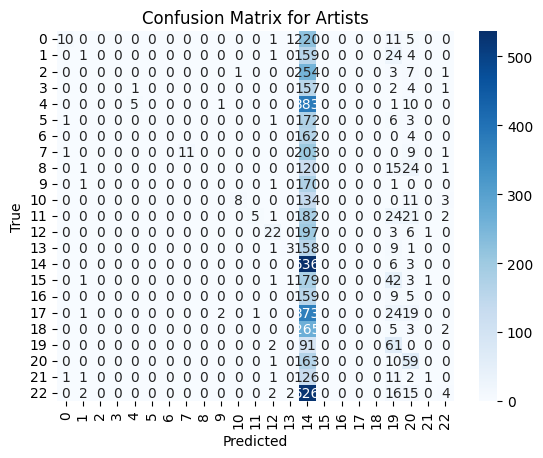


Outlier Detection:
Outliers based on distances from centroids: (array([  23,  184,  204,  230,  266,  327,  355,  385,  414,  455,  550,
        605,  648,  774,  866,  886,  919,  960,  992,  997, 1029, 1072,
       1101, 1103, 1174, 1175, 1180, 1181, 1189, 1202, 1225, 1254, 1260,
       1282, 1294, 1307, 1372, 1396, 1400, 1404, 1433, 1438, 1457, 1521,
       1550, 1558, 1684, 1703, 1820, 1838, 1862, 1884, 1889, 1932, 1937,
       2037, 2126, 2144, 2149, 2155, 2172, 2173, 2182, 2200, 2209, 2255,
       2270, 2285, 2300, 2314, 2322, 2323, 2325, 2326, 2334, 2351, 2382,
       2383, 2389, 2392, 2396, 2405, 2408, 2413, 2425, 2457, 2491, 2496,
       2502, 2521, 2615, 2618, 2622, 2635, 2645, 2651, 2669, 2674, 2702,
       2710, 2758, 2762, 2764, 2777, 2786, 2789, 2795, 2801, 2839, 2841,
       2856, 2867, 2872, 2889, 2897, 2907, 2937, 3044, 3081, 3179, 3241,
       3253, 3420, 3451, 3452, 3458, 3459, 3463, 3466, 3478, 3486, 3492,
       3515, 3522, 3537, 3558, 3560, 3572, 3576, 3617, 3619

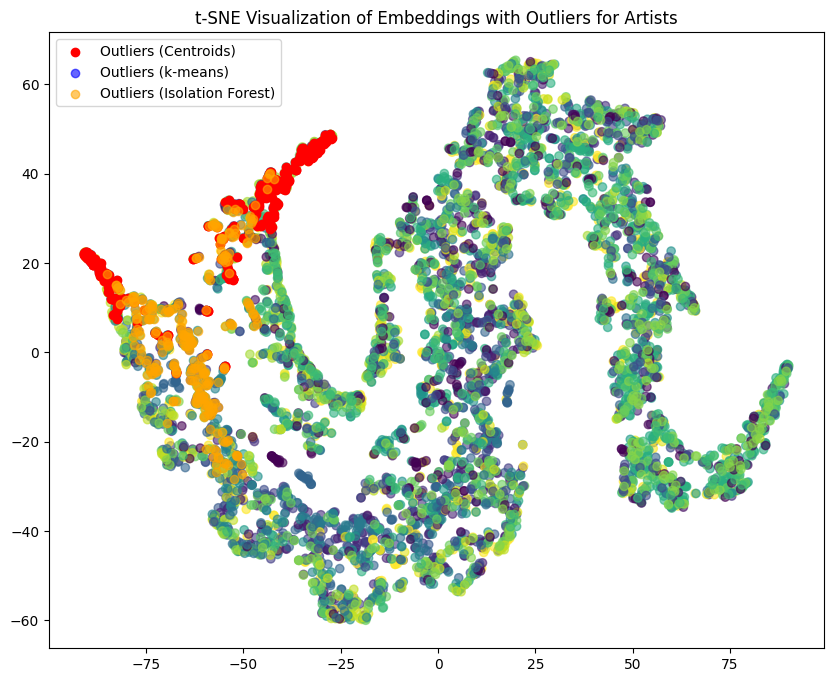


--- Task: Genres ---
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 805ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 815ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 816ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 812ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 794ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 800ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 802ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 812ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 779ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 806ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 812ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 765ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 785ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 774ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 833ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 778ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 771ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 796ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 785ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 790ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 799ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 790ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 786ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 783ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 785ms/step
2/2

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


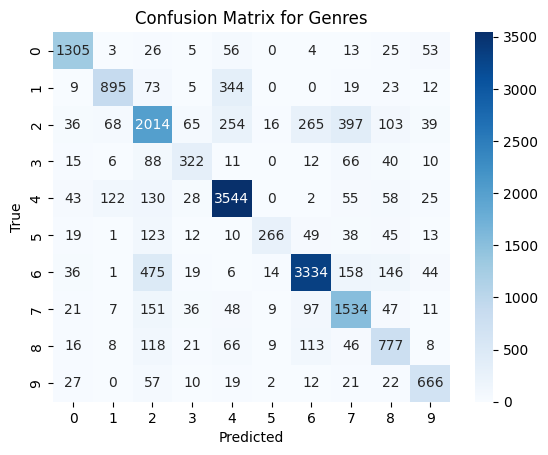


Outlier Detection:
Outliers based on distances from centroids: (array([   40,    41,    57,    86,   112,   127,   132,   134,   139,
         149,   154,   170,   181,   189,   237,   253,   274,   281,
         285,   302,   303,   336,   357,   414,   429,   436,   462,
         464,   475,   486,   488,   494,   498,   505,   506,   554,
         560,   590,   629,   668,   674,   675,   701,   720,   734,
         739,   777,   794,   804,   811,   871,   892,   898,   917,
         923,   961,   982,   995,  1016,  1022,  1051,  1054,  1065,
        1083,  1098,  1133,  1134,  1142,  1144,  1145,  1147,  1149,
        1151,  1163,  1182,  1184,  1189,  1222,  1242,  1243,  1262,
        1324,  1339,  1344,  1352,  1356,  1359,  1369,  1379,  1400,
        1429,  1452,  1496,  1500,  1575,  1586,  1591,  1598,  1630,
        1669,  1685,  1709,  1733,  1749,  1750,  1786,  1805,  1832,
        1837,  1843,  1844,  1849,  1890,  1903,  1918,  1990,  1993,
        2001,  2026,  204

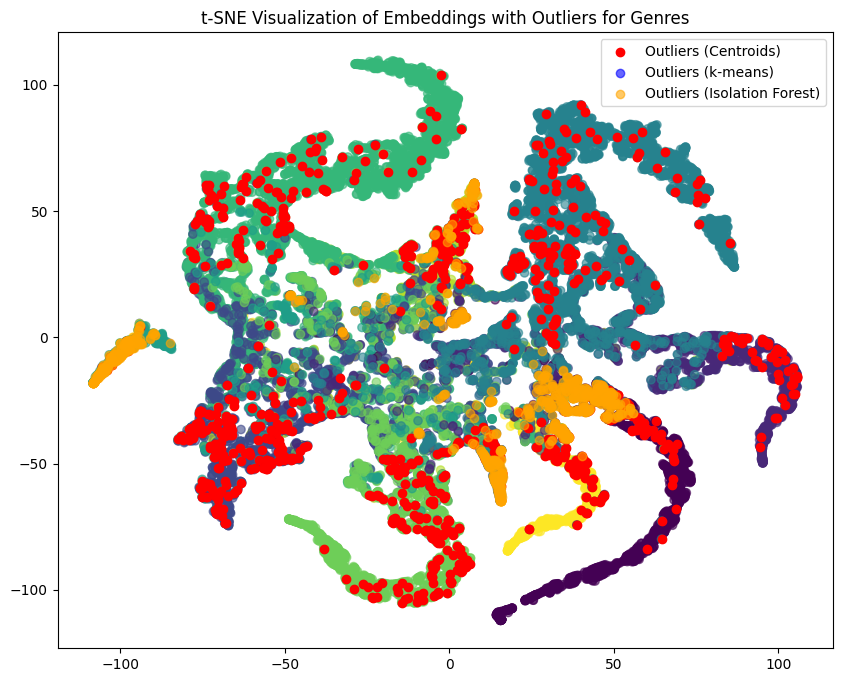


--- Task: Styles ---
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 765ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 785ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 833ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 856ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 812ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 867ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 817ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 852ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 811ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 844ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 797ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 803ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 790ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 807ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 893ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 790ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 807ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 809ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 808ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 800ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 799ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 798ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 801ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 792ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 799ms/step
2/2

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie


Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.50      0.54       834
           1       0.00      0.00      0.00        29
           2       0.72      0.55      0.62        33
           3       0.57      0.54      0.55      1300
           4       0.60      0.62      0.61      1272
           5       0.74      0.70      0.72       484
           6       0.93      0.10      0.18       144
           7       0.65      0.49      0.56       670
           8       0.39      0.77      0.52       417
           9       0.38      0.66      0.48      2020
          10       0.57      0.07      0.13       280
          11       0.47      0.26      0.33       402
          12       0.66      0.69      0.67      3918
          13       0.45      0.45      0.45       383
          14       0.69      0.73      0.71       401
          15       0.75      0.44      0.55       721
          16       0.00      0.00      0.00        94
   

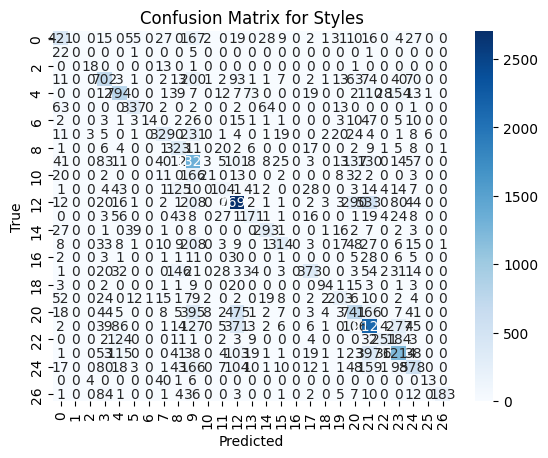


Outlier Detection:
Outliers based on distances from centroids: (array([    1,    58,    72, ..., 24379, 24397, 24406], dtype=int64),)
Outliers based on k-means clustering: (array([], dtype=int64),)
Outliers detected by Isolation Forest: (array([  218,   278,   443, ..., 24237, 24322, 24366], dtype=int64),)


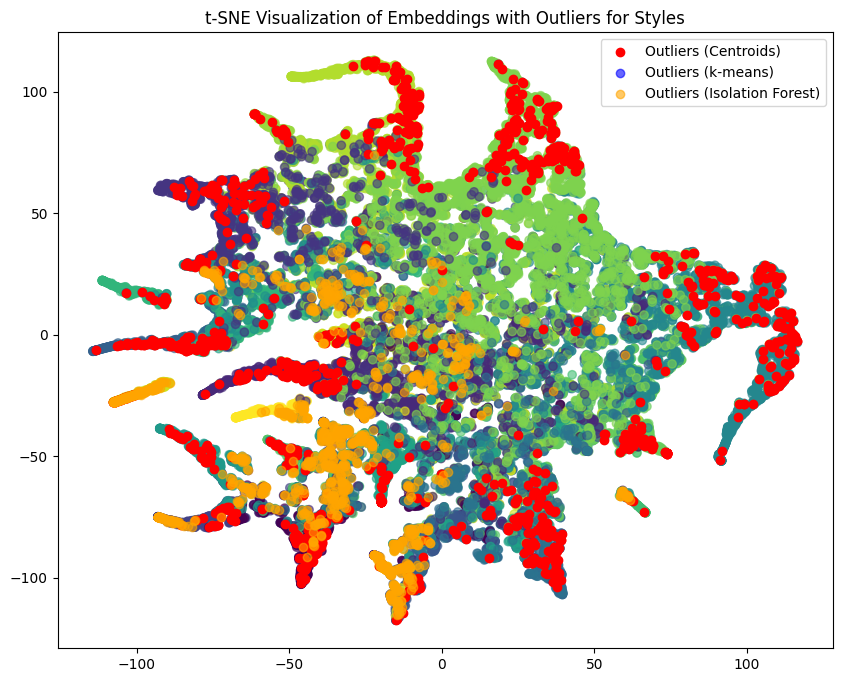

In [8]:
import os
import glob
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

IMG_SHAPE = (224, 224, 3)
BATCH_SIZE = 1000
NEW_BATCH_SIZE = 64 
ARTISTS_FOLDER = "processed_batches_artists_val"
GENRES_FOLDER = "processed_batches_genres_val"
STYLES_FOLDER = "processed_batches_styles_val"

def npz_generator(folder, batch_size=1000):
    """
    Generator that processes `.npz` files and yields batches of (images, labels),
    including partial batches when encountered.
    Args:
        folder: Path to the folder containing `.npz` files.
        batch_size: Expected number of images per `.npz` file.
    Yields:
        imgs: Batch of images (shape: [N, height, width, channels]).
        labels: Batch of corresponding labels (shape: [N]).
    """
    files = sorted(glob.glob(os.path.join(folder, "*.npz")))
    for f in files:
        data = np.load(f)
        imgs = data['arr_0']
        labels = data['labels'] 
        current_batch_size = imgs.shape[0] 

        if current_batch_size < batch_size:
            print(f"Warning: File {f} has only {current_batch_size} images (expected {batch_size}). Yielding partial batch.")

        yield imgs, labels

def create_dataset(folder):
    """
    Create a TensorFlow dataset from the given folder.
    Args:
        folder: Path to the folder containing `.npz` files.
    Returns:
        tf.data.Dataset object
    """
    dataset = tf.data.Dataset.from_generator(
        lambda: npz_generator(folder),
        output_types=(tf.float32, tf.int32),
        output_shapes=((None, IMG_SHAPE[0], IMG_SHAPE[1], IMG_SHAPE[2]), (None,))
    )
    dataset = dataset.unbatch().batch(NEW_BATCH_SIZE)  # Unbatch and re-batch to NEW_BATCH_SIZE
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)  # Prefetch data for efficiency
    return dataset

artists_val_dataset = create_dataset(ARTISTS_FOLDER)
genres_val_dataset = create_dataset(GENRES_FOLDER)
styles_val_dataset = create_dataset(STYLES_FOLDER)

def extract_embeddings(model, dataset):
    """
    Extract embeddings (penultimate layer outputs) from the given dataset using the model.
    Args:
        model: The trained Keras model.
        dataset: Dataset to extract embeddings from.
    Returns:
        embeddings: Feature embeddings.
        labels: Corresponding labels.
    """
    embeddings = []
    labels = []
    for batch_imgs, batch_labels in dataset:
        batch_embeddings = model.predict(batch_imgs)
        embeddings.append(batch_embeddings)
        labels.append(batch_labels.numpy())
    embeddings = np.concatenate(embeddings, axis=0)
    labels = np.concatenate(labels, axis=0)
    return embeddings, labels

def evaluate_and_detect_outliers(model, dataset, task_name, num_classes):
    """
    Perform classification evaluation and outlier detection for a specific task.
    Args:
        model: Trained Keras model.
        dataset: Validation dataset.
        task_name: Name of the task (e.g., 'Artists', 'Genres', 'Styles').
        num_classes: Number of unique classes for the task.
    """
    print(f"\n--- Task: {task_name} ---")
    
    embeddings, labels = extract_embeddings(model, dataset)
    preds = model.predict(dataset.map(lambda x, y: x))  # Only feed images to the model
    pred_classes = np.argmax(preds, axis=1)

    print("\nClassification Report:")
    print(classification_report(labels, pred_classes))

    print("\nConfusion Matrix:")
    cm = confusion_matrix(labels, pred_classes)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix for {task_name}")
    plt.show()

    print("\nOutlier Detection:")
    
    # Option : distance from Centroids
    class_centroids = {}
    for c in np.unique(labels):
        class_embeddings = embeddings[labels == c]
        class_centroids[c] = np.mean(class_embeddings, axis=0)

    distances = [np.linalg.norm(embeddings[i] - class_centroids[labels[i]]) for i in range(len(labels))]
    outlier_threshold = np.percentile(distances, 95)
    outliers = np.where(distances > outlier_threshold)
    print(f"Outliers based on distances from centroids: {outliers}")

    # Option : clustering (k-means)
    kmeans = KMeans(n_clusters=num_classes).fit(embeddings)
    cluster_distances = kmeans.transform(embeddings)
    outliers_kmeans = np.where(np.min(cluster_distances, axis=1) > np.percentile(cluster_distances, 95))
    print(f"Outliers based on k-means clustering: {outliers_kmeans}")

    # Option : isolation Forest
    iso_forest = IsolationForest(contamination=0.05)
    outlier_predictions = iso_forest.fit_predict(embeddings)
    outliers_isolation_forest = np.where(outlier_predictions == -1)
    print(f"Outliers detected by Isolation Forest: {outliers_isolation_forest}")

    # Visualization of Outliers
    tsne = TSNE(n_components=2, random_state=42)
    reduced_embeddings = tsne.fit_transform(embeddings)

    plt.figure(figsize=(10, 8))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels, cmap='viridis', alpha=0.6)
    plt.scatter(reduced_embeddings[outliers, 0], reduced_embeddings[outliers, 1], c='red', label='Outliers (Centroids)')
    plt.scatter(reduced_embeddings[outliers_kmeans, 0], reduced_embeddings[outliers_kmeans, 1], c='blue', label='Outliers (k-means)', alpha=0.6)
    plt.scatter(reduced_embeddings[outliers_isolation_forest, 0], reduced_embeddings[outliers_isolation_forest, 1], c='orange', label='Outliers (Isolation Forest)', alpha=0.6)
    plt.legend()
    plt.title(f"t-SNE Visualization of Embeddings with Outliers for {task_name}")
    plt.show()

artists_model = tf.keras.models.load_model("./saved_models/best_artist_model.keras")
genres_model = tf.keras.models.load_model("./saved_models/best_genre_model.keras")
styles_model = tf.keras.models.load_model("./saved_models/best_style_model.keras")


tasks = [
    {
        "name": "Artists",
        "dataset": artists_val_dataset,
        "num_classes": 23,
        "model": artists_model
    },
    {
        "name": "Genres",
        "dataset": genres_val_dataset,
        "num_classes": 10,
        "model": genres_model
    },
    {
        "name": "Styles",
        "dataset": styles_val_dataset,
        "num_classes": 27,
        "model": styles_model
    }
]

for task in tasks:
    evaluate_and_detect_outliers(
        model=task["model"],
        dataset=task["dataset"],
        task_name=task["name"],
        num_classes=task["num_classes"]
    )